In [86]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from config import Ising2DTF
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from scipy.stats import randint as sp_randint

from collections import Counter

In [87]:
M_Data = np.loadtxt("data\Magnetization_data2.txt")

In [88]:
Classifier_Y = np.round(M_Data[:,3])
X = M_Data[:,0:3]

In [89]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Classifier_Y, test_size=0.2)

In [90]:
model = SVC(kernel = 'linear', gamma = 'auto')
Y_pred = cross_val_predict(model, X_train, Y_train, cv=8)
model.fit(X_train, Y_train)

print("|kernel")
print(metrics.classification_report(Y_train, Y_pred))
print(metrics.confusion_matrix(Y_train, Y_pred))

|kernel
              precision    recall  f1-score   support

         0.0       0.94      0.75      0.84       254
         1.0       0.99      1.00      1.00      7746

    accuracy                           0.99      8000
   macro avg       0.97      0.88      0.92      8000
weighted avg       0.99      0.99      0.99      8000

[[ 191   63]
 [  12 7734]]


In [91]:
xx = np.linspace(0, 100, 101)
yy = np.linspace(0, 100, 101)
zz = np.linspace(0, 100, 101)
XX, YY, ZZ = np.meshgrid(xx, yy, zz)
xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T

XYZ = model.decision_function(xyz)

In [94]:
surf = []

for n, coord in enumerate(xyz):
    if abs(XYZ[n])<0.01:
        surf.append(coord)

In [95]:
surfarray = np.array(surf)
surfarray

array([[ 0.,  0.,  7.],
       [ 1.,  0.,  9.],
       [ 2.,  0., 11.],
       ...,
       [ 1., 38., 94.],
       [ 2., 38., 96.],
       [ 0., 39., 94.]])

In [96]:
X_F = []
X_P = []

for i, p in enumerate(Y_test):
    if p<0.5:
        X_F.append(X_test[i])
    else:
        X_P.append(X_test[i])
        

In [97]:
X_0 = np.array(X_F)
X_1 = np.array(X_P)


In [98]:
np.shape(X_0)

(60, 3)

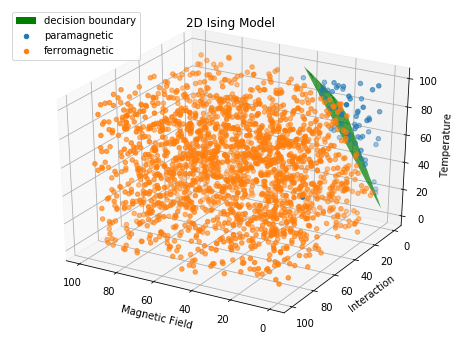

In [102]:
figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
surf = ax.plot_trisurf(surfarray[:,0], surfarray[:,1], surfarray[:,2], color = 'green', label = "decision boundary")
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax.scatter(X_0[:,0], X_0[:,1], X_0[:,2], label = "paramagnetic")
ax.scatter(X_1[:,0], X_1[:,1], X_1[:,2], label = "ferromagnetic")
ax.set_title('2D Ising Model');
ax.view_init(30, 120)
ax.set_xlabel('Magnetic Field')
ax.set_ylabel('Interaction')
ax.set_zlabel('Temperature')
ax.legend(loc=2)